In [87]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:

# Locate CSVs in resources in folder
net_overseas_migration_larger_states = Path("Resources/Graph 5.1 Net overseas migration(a) - larger states(b) - year ending.csv")
net_overseas_migration_smaller_states = Path("Resources/Graph 5.2 Net overseas migration(a) - smaller states and territories(b) - year ending.csv")

# Load CSV files into DataFrames and remove the first rows (as not relevant data)
df_larger_states_migration = pd.read_csv(net_overseas_migration_larger_states, skiprows=1)
df_smaller_states_migration = pd.read_csv(net_overseas_migration_smaller_states, skiprows=1)

# Merge into one migration dataframe
merged_df_migration = pd.merge(df_larger_states_migration, df_smaller_states_migration, on='Quarter')

#Display migration dataframe
merged_df_migration

# Remove rows with no values 
merged_df_migration = merged_df_migration.dropna(subset=['Quarter'])

# Remove non-date values 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering) 
merged_df_migration['Quarter'] = pd.to_datetime(merged_df_migration['Quarter'], format='%b-%y')

# Filter to remove data after December 2021 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'] <= pd.to_datetime('Dec-21', format='%b-%y')]

# Convert the Quarter column back to original format (for cleaner visualisation)
merged_df_migration['Quarter'] = merged_df_migration['Quarter'].dt.strftime('%b-%y')

#Display cleaned merged migration dataframe
merged_df_migration

In [2]:
# Locate CSVs in resources in folder
residential_property_price_indexes = Path("Resources/Residential Property Price Indexes, capital cities.csv")

#Load CSV file into DataFrame and remove the first row (as not relevant data)
df_property_price_indexes = pd.read_csv(residential_property_price_indexes, skiprows=1)

# Remove rows with no values 
df_property_price_indexes = df_property_price_indexes.dropna(subset=['Quarter'])

# Remove non-date values 
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering)
df_property_price_indexes['Quarter'] = pd.to_datetime(df_property_price_indexes['Quarter'], format='%b-%y')

# Filter to remove data pre June 2013 (to align data range with migration data)
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'] >= pd.to_datetime('Jun-13', format='%b-%y')]

# Convert the Quarter column back to original format for cleaner visualisation
df_property_price_indexes['Quarter'] = df_property_price_indexes['Quarter'].dt.strftime('%b-%y')


,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Weighted average of eight capital cities
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,105.7
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,108.3
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,112.6
9,Mar-14,121.7,110.7,108.5,114.8,105.4,103.7,114.0,102.3,114.2
10,Jun-14,126.0,112.1,110.5,114.8,105.6,104.1,114.7,103.3,116.4
11,Sep-14,128.8,113.1,111.0,114.5,106.1,104.4,114.4,103.5,117.8
12,Dec-14,133.4,115.2,112.3,114.5,107.3,105.2,113.7,104.3,120.2
13,Mar-15,137.6,115.9,112.7,114.4,108.0,105.7,113.5,105.4,122.1
14,Jun-15,149.8,120.8,113.7,113.4,108.5,105.7,112.6,106.2,127.8
15,Sep-15,154.4,124.3,115.2,110.7,109.8,106.2,112.1,107.6,130.4


In [18]:

# Reorganising the columns to align with the order of the migration data (swap Adelaide and Perth)
df_property_price_indexes = df_property_price_indexes[["Quarter", "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Hobart", "Darwin", "Canberra"]]
df_property_price_indexes.head(2)


,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [19]:
df_property_price_indexes['Sydney Variation'] = round(df_property_price_indexes['Sydney'].pct_change() * 100,2)
df_property_price_indexes['Melbourne Variation'] = round(df_property_price_indexes['Melbourne'].pct_change() * 100,2)
df_property_price_indexes['Brisbane Variation'] = round(df_property_price_indexes['Brisbane'].pct_change() * 100,2)
df_property_price_indexes['Perth Variation'] = round(df_property_price_indexes['Perth'].pct_change() * 100,2)
df_property_price_indexes['Adelaide Variation'] = round(df_property_price_indexes['Adelaide'].pct_change() * 100,2)
df_property_price_indexes['Hobart Variation'] = round(df_property_price_indexes['Hobart'].pct_change() * 100,2)
df_property_price_indexes['Darwin Variation'] = round(df_property_price_indexes['Darwin'].pct_change() * 100,2)
df_property_price_indexes['Canberra Variation'] = round(df_property_price_indexes['Canberra'].pct_change() * 100,2)

In [20]:
df_property_price_indexes.head(3)

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Sydney Variation,Melbourne Variation,Brisbane Variation,Perth Variation,Adelaide Variation,Hobart Variation,Darwin Variation,Canberra Variation
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,3.77,3.12,1.26,0.09,0.40,1.00,0.27,0.10
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,5.50,3.59,2.49,2.89,3.06,2.28,1.35,0.69


In [24]:
df_property_price_indexes.fillna(0, inplace = True)
df_property_price_indexes

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Sydney Variation,Melbourne Variation,Brisbane Variation,Perth Variation,Adelaide Variation,Hobart Variation,Darwin Variation,Canberra Variation
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,3.77,3.12,1.26,0.09,0.40,1.00,0.27,0.10
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,5.50,3.59,2.49,2.89,3.06,2.28,1.35,0.69
9,Mar-14,121.7,110.7,108.5,114.8,105.4,103.7,114.0,102.3,2.27,0.91,1.31,0.79,0.96,0.39,1.06,0.49
10,Jun-14,126.0,112.1,110.5,114.8,105.6,104.1,114.7,103.3,3.53,1.26,1.84,0.00,0.19,0.39,0.61,0.98
11,Sep-14,128.8,113.1,111.0,114.5,106.1,104.4,114.4,103.5,2.22,0.89,0.45,-0.26,0.47,0.29,-0.26,0.19
12,Dec-14,133.4,115.2,112.3,114.5,107.3,105.2,113.7,104.3,3.57,1.86,1.17,0.00,1.13,0.77,-0.61,0.77
13,Mar-15,137.6,115.9,112.7,114.4,108.0,105.7,113.5,105.4,3.15,0.61,0.36,-0.09,0.65,0.48,-0.18,1.05
14,Jun-15,149.8,120.8,113.7,113.4,108.5,105.7,112.6,106.2,8.87,4.23,0.89,-0.87,0.46,0.00,-0.79,0.76
15,Sep-15,154.4,124.3,115.2,110.7,109.8,106.2,112.1,107.6,3.07,2.90,1.32,-2.38,1.20,0.47,-0.44,1.32


In [76]:
reduced_df = df_property_price_indexes[['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]
reduced_df.head(2)


,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [79]:
capitals = list(reduced_df.columns)
average_list = []
median_list = []
variance_list = []
stddev_list = []
max_list = []
min_list = []
total_variation = []

for columns in reduced_df:
    mean = round(reduced_df[columns].mean(),2)
    average_list.append(mean)
    median = round(reduced_df[columns].median(),2)
    median_list.append(median)
    variance = round(reduced_df[columns].var(),2)
    variance_list.append(mean)
    std_dev = round(reduced_df[columns].std(),2)
    stddev_list.append(std_dev)
    max = round(reduced_df[columns].max(),2)
    max_list.append(max)
    min = round(reduced_df[columns].min(),2)
    min_list.append(min)
    start = reduced_df.loc[reduced_df.index[0],columns]
    end = reduced_df.loc[reduced_df.index[-1],columns]
    variation = round((end - start) / start * 100, 2)
    total_variation.append(variation)


In [82]:
cap_latitude = [-33.8678, -37.8142 , -27.4678, -31.9559, -34.9275,-42.8806,-12.4381,-35.2931]
cap_longitude = [151.2100, 144.9631, 153.0281, 115.8606, 138.6000,147.3250,130.8411,149.1269]

In [83]:

summary_df = pd.DataFrame({'Cities':capitals,
                           'Average':average_list,
                           'Median':median_list,
                           'Variance':variance_list,
                           'Standard Deviation':stddev_list,
                           'Max': max_list,
                           'Min': min_list,
                           'Total Variation': total_variation,
                           'Latitude':cap_latitude,
                           'Longitude':cap_longitude 
                           })

In [84]:
summary_df

,Cities,Average,Median,Variance,Standard Deviation,Max,Min,Total Variation,Latitude,Longitude
0,Sydney,158.91,160.5,158.91,24.95,218.7,108.7,101.20,-33.8678,151.2100
1,Melbourne,138.89,142.9,138.89,20.84,185.7,102.7,80.82,-37.8142,144.9631
2,Brisbane,121.75,121.7,121.75,12.09,164.9,103.2,59.79,-27.4678,153.0281
3,Perth,107.69,106.6,107.69,5.93,120.1,98.5,8.59,-31.9559,115.8606
4,Adelaide,117.82,118.7,117.82,11.86,156.3,100.9,54.91,-34.9275,138.6000
5,Hobart,133.72,129.0,133.72,29.40,211.1,100.0,111.10,-42.8806,147.3250
6,Darwin,100.86,100.1,100.86,9.70,114.7,86.9,-8.92,-12.4381,130.8411
7,Canberra,121.25,121.5,121.25,17.19,173.5,101.0,71.78,-35.2931,149.1269


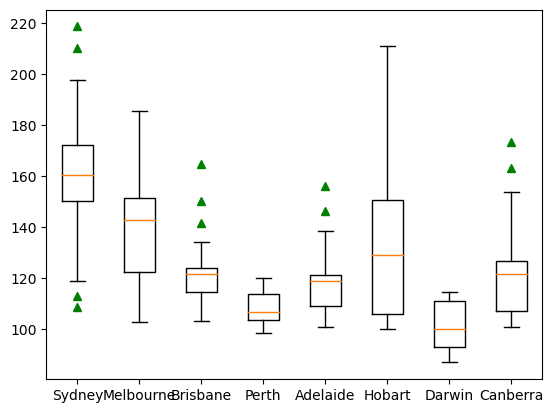

In [93]:
plt.boxplot(reduced_df, labels = capitals, sym = '^g')

plt.show()